In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../")))

from database_operations import DatabaseOperations
from overtake_model import OvertakingModel
from race_data import RaceDataSetup
from race_dataframe import RaceDataframe
from race_sim import RaceSimulator
from evaluation import RaceSimEvaluation, EvaluateMany

import pandas as pd
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option('display.max_colwidth', None) 

## Mexico GP

In [2]:
# Initialise all classes
database_ops_mexico = DatabaseOperations(2024, "Mexico City")
race_df_mexico = RaceDataframe(database_ops_mexico)
race_data_mexico = RaceDataSetup(database_ops_mexico, race_df_mexico)
overtake_model_mexico = OvertakingModel(race_df_mexico.race_df)
simulation_mexico = RaceSimulator(race_data_mexico, overtake_model_mexico)

In [3]:
simulation_mexico.simulate()
evaluation_mexico = RaceSimEvaluation(simulation_mexico, race_df_mexico, database_ops_mexico)
evaluation_mexico.comparison_df

,driver_name,laps_completed,position_sim,position_actual,position_error,overtakes_sim,overtakes_actual,overtake_error,cumulative_time_sim,cumulative_time_actual,cumulative_time_error,gap_to_leader_sim,gap_to_leader_actual,gap_error
0,Carlos Sainz,71,1,1.0,0.0,3,0,3,6262.071582,6023.912,238.159582,0.0,0.0,0.0
1,Lando Norris,71,2,2.0,0.0,1,2,-1,6265.625562,6028.139,237.486562,3.553981,4.227,-0.673019
2,Charles Leclerc,71,3,3.0,0.0,3,1,2,6296.672180,6057.475,239.19718,34.600598,33.563,1.037598
3,Lewis Hamilton,71,4,4.0,0.0,6,2,4,6303.550611,6067.579,235.971611,41.479029,43.667,-2.187971
4,George Russell,71,5,5.0,0.0,5,2,3,6308.188553,6071.151,237.037553,46.116971,47.239,-1.122029
5,Oscar Piastri,71,6,8.0,-2.0,5,4,1,6315.509875,6083.971,231.538875,53.438294,60.059,-6.620706
6,Max Verstappen,71,7,6.0,1.0,1,4,-3,6318.398870,6083.463,234.93587,56.327288,59.551,-3.223712
7,Kevin Magnussen,71,8,7.0,1.0,6,1,5,6326.903948,6086.111,240.792948,64.832366,62.199,2.633366
8,Nico Hulkenberg,70,9,9.0,0.0,4,2,2,6342.926658,6024.711,318.215658,80.855077,81.384,-0.528923
9,Pierre Gasly,70,10,10.0,0.0,3,3,0,6362.695447,5959.340,403.355447,100.623866,16.013,84.610866


In [4]:
print(evaluation_mexico.comparison_df["overtakes_actual"].sum())
print(evaluation_mexico.comparison_df["overtakes_sim"].sum())

66
80


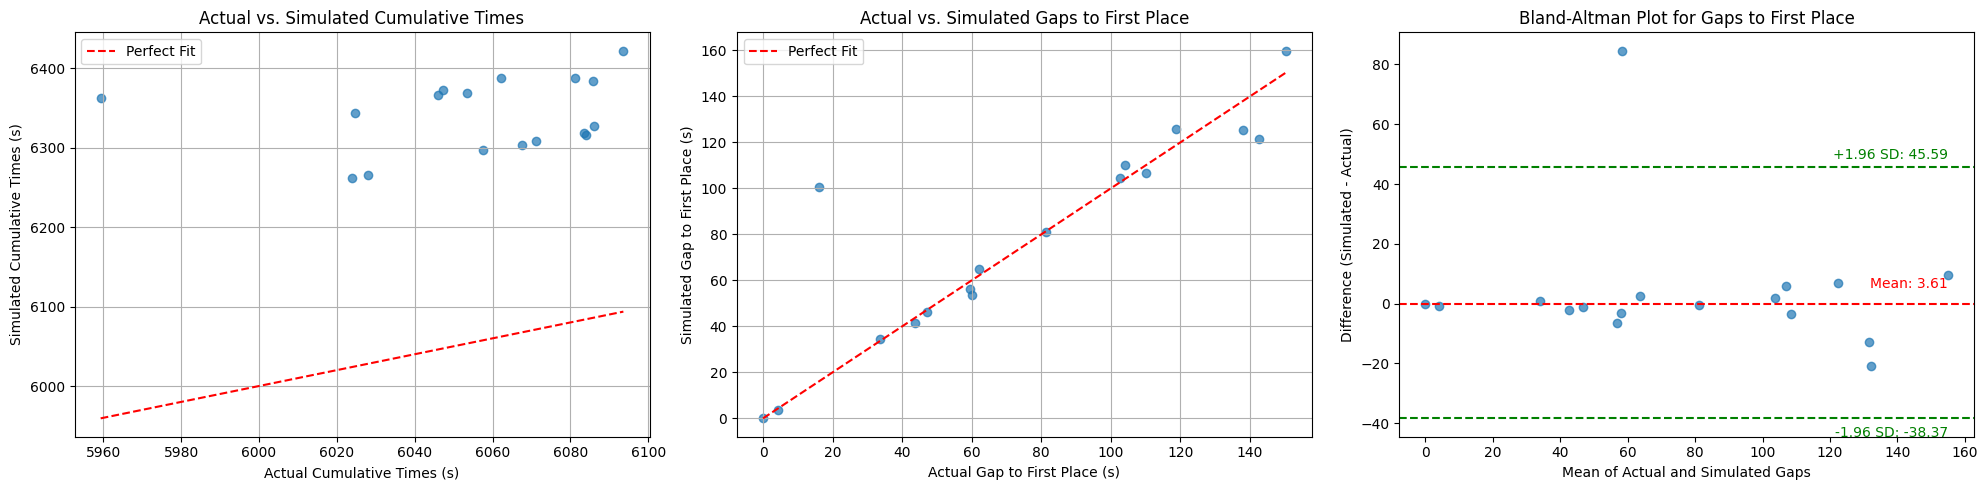

In [5]:
evaluation_mexico.plot_evaluation_results()

In [6]:
evaluation_mexico.calculate_general_errors()

{'total_absolute_position_error': 10.0,
 'position_mae': 0.5882352941176471,
 'total_absolute_overtake_error': 46,
 'overtake_mae': 2.7058823529411766,
 'cumulative_time_mae': 284.43069000079635,
 'gap_mae': 9.67341804637154}

In [7]:
evaluation_mexico.calculate_spearman()

{'cumulative_times': {'correlation': 0.32352941176470595,
  'p_value': 0.20524666282786772},
 'gaps_to_leader': {'correlation': 0.9166666666666667,
  'p_value': 2.317116555636978e-07}}

In [8]:
evaluation_mexico.calculate_wilcoxon()

{'cumulative_times': {'statistic': 0.0,
  'expected_value': 76.5,
  'p_value': 1.52587890625e-05},
 'gaps_to_leader': {'statistic': 66.0,
  'expected_value': 68.0,
  'p_value': 0.9176315934670087}}

## Singapore GP

In [9]:
# Initialise all classes
database_ops_singapore = DatabaseOperations(2024, "Marina Bay")
race_df_singapore = RaceDataframe(database_ops_singapore)
race_data_singapore = RaceDataSetup(database_ops_singapore, race_df_singapore)
overtake_model_singapore = OvertakingModel(race_df_singapore.race_df)
simulation_singapore = RaceSimulator(race_data_singapore, overtake_model_singapore)

In [10]:
simulation_singapore.simulate()
evaluation_singapore = RaceSimEvaluation(simulation_singapore, race_df_singapore, database_ops_singapore)
evaluation_singapore.comparison_df

,driver_name,laps_completed,position_sim,position_actual,position_error,overtakes_sim,overtakes_actual,overtake_error,cumulative_time_sim,cumulative_time_actual,cumulative_time_error,gap_to_leader_sim,gap_to_leader_actual,gap_error
0,Lando Norris,62,1,1,0,0,0,0,6250.063474,6021.378,228.685474,0.0,0.0,0.0
1,Max Verstappen,62,2,2,0,0,1,-1,6276.788113,6041.680,235.108113,26.724639,20.302,6.422639
2,Oscar Piastri,62,3,3,0,0,1,-1,6299.615119,6060.709,238.906119,49.551645,39.331,10.220645
3,George Russell,62,4,4,0,3,3,0,6310.429502,6080.382,230.047502,60.366028,59.004,1.362028
4,Charles Leclerc,62,5,5,0,0,2,-2,6316.788260,6080.444,236.34426,66.724786,59.066,7.658786
5,Lewis Hamilton,62,6,6,0,11,4,7,6320.676831,6105.379,215.297831,70.613357,84.001,-13.387643
6,Carlos Sainz,62,7,7,0,4,3,1,6333.382081,6112.851,220.531081,83.318607,91.473,-8.154393
7,Fernando Alonso,61,8,8,0,1,3,-2,6346.482295,6019.244,327.238295,96.418821,95.788,0.630821
8,Franco Colapinto,61,9,11,-2,0,2,-2,6349.993392,6023.832,326.161392,99.929918,100.376,-0.446082
9,Nico Hulkenberg,61,10,9,1,1,2,-1,6350.501626,6022.138,328.363626,100.438152,98.682,1.756152


In [11]:
print(evaluation_singapore.comparison_df["overtakes_actual"].sum())
print(evaluation_singapore.comparison_df["overtakes_sim"].sum())

58
25


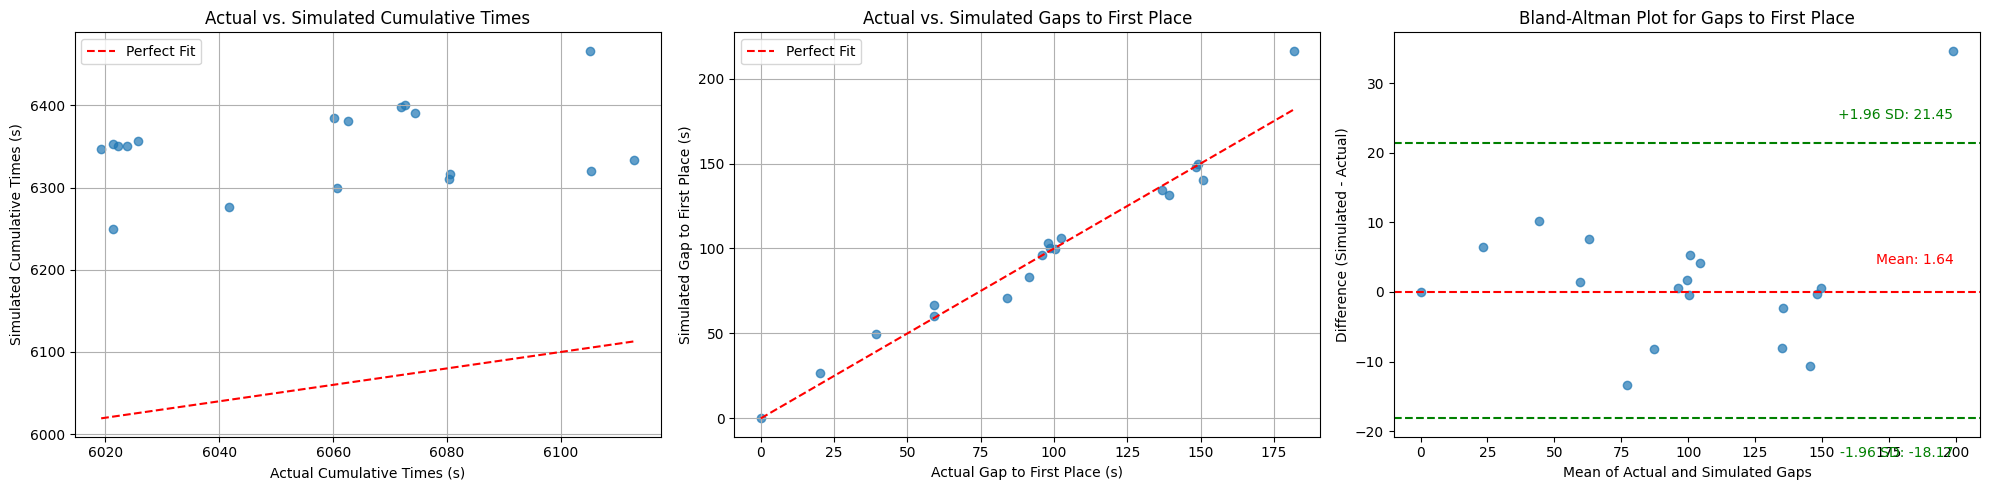

In [12]:
evaluation_singapore.plot_evaluation_results()

In [13]:
evaluation_singapore.calculate_general_errors()

{'total_absolute_position_error': 10,
 'position_mae': 0.5555555555555556,
 'total_absolute_overtake_error': 42,
 'overtake_mae': 2.3333333333333335,
 'cumulative_time_mae': 290.16807283754656,
 'gap_mae': 6.447870085013063}

In [14]:
evaluation_singapore.calculate_spearman()

{'cumulative_times': {'correlation': 0.1455108359133127,
  'p_value': 0.5645405304670836},
 'gaps_to_leader': {'correlation': 0.9834881320949431,
  'p_value': 2.6382891204281573e-13}}

In [15]:
evaluation_singapore.calculate_wilcoxon()

{'cumulative_times': {'statistic': 0.0,
  'expected_value': 85.5,
  'p_value': 7.62939453125e-06},
 'gaps_to_leader': {'statistic': 66.0,
  'expected_value': 76.5,
  'p_value': 0.6191537066890378}}

## Spanish GP

In [16]:
# Initialise all classes
database_ops_spain = DatabaseOperations(2024, "Barcelona")
race_df_spain = RaceDataframe(database_ops_spain)
race_data_spain = RaceDataSetup(database_ops_spain, race_df_spain)
overtake_model_spain = OvertakingModel(race_df_spain.race_df)
simulation_spain = RaceSimulator(race_data_spain, overtake_model_spain)

In [17]:
simulation_spain.simulate()
evaluation_spain = RaceSimEvaluation(simulation_spain, race_df_spain, database_ops_spain)
evaluation_spain.comparison_df

,driver_name,laps_completed,position_sim,position_actual,position_error,overtakes_sim,overtakes_actual,overtake_error,cumulative_time_sim,cumulative_time_actual,cumulative_time_error,gap_to_leader_sim,gap_to_leader_actual,gap_error
0,Max Verstappen,66,1,1,0,0,2,-2,5508.358625,5272.753,235.605625,0.000000,0.000,0.000000
1,Lando Norris,66,2,2,0,0,2,-2,5508.899783,5274.644,234.255783,0.541159,1.891,-1.349841
2,Lewis Hamilton,66,3,3,0,0,5,-5,5523.936221,5289.975,233.961221,15.577596,17.222,-1.644404
3,George Russell,66,4,4,0,0,7,-7,5526.128720,5295.604,230.524720,17.770095,22.851,-5.080905
4,Carlos Sainz,66,5,6,-1,5,7,-2,5531.174182,5302.545,228.629182,22.815558,29.792,-6.976442
5,Charles Leclerc,66,6,5,1,0,4,-4,5532.317369,5294.657,237.660369,23.958744,21.904,2.054744
6,Oscar Piastri,66,7,7,0,0,4,-4,5539.854055,5304.789,235.065055,31.495430,32.036,-0.540570
7,Sergio Perez,66,8,8,0,3,6,-3,5553.944941,5329.899,224.045941,45.586316,57.146,-11.559684
8,Pierre Gasly,66,9,9,0,0,7,-7,5568.465286,5333.171,235.294286,60.106661,60.418,-0.311339
9,Esteban Ocon,66,10,10,0,0,7,-7,5576.192338,5342.652,233.540338,67.833713,69.899,-2.065287


In [18]:
print(evaluation_spain.comparison_df["overtakes_actual"].sum())
print(evaluation_spain.comparison_df["overtakes_sim"].sum())

116
12


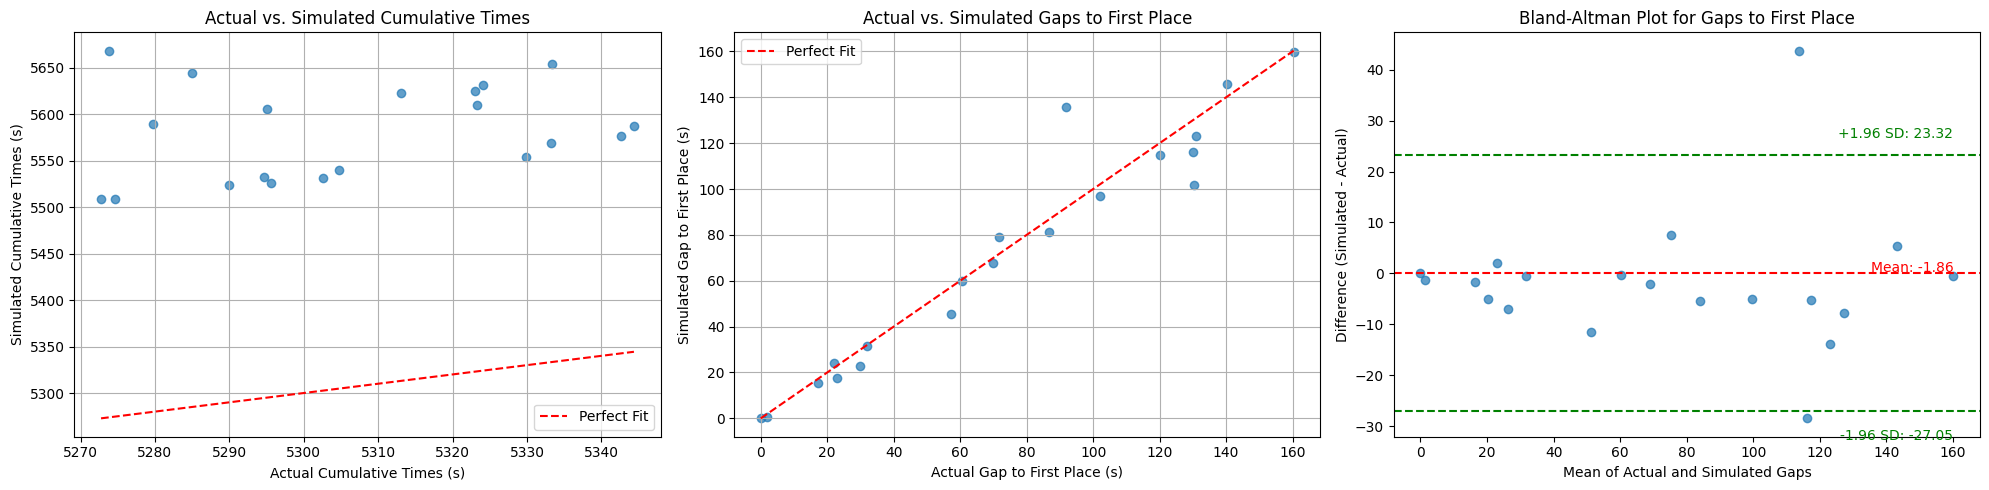

In [19]:
evaluation_spain.plot_evaluation_results()

In [20]:
evaluation_spain.calculate_general_errors()

{'total_absolute_position_error': 12,
 'position_mae': 0.6,
 'total_absolute_overtake_error': 104,
 'overtake_mae': 5.2,
 'cumulative_time_mae': 273.61455424301596,
 'gap_mae': 7.7349295273170355}

In [21]:
evaluation_spain.calculate_spearman()

{'cumulative_times': {'correlation': 0.26917293233082706,
  'p_value': 0.2511314536907905},
 'gaps_to_leader': {'correlation': 0.9684210526315788,
  'p_value': 2.6449829899729473e-12}}

In [22]:
evaluation_spain.calculate_wilcoxon()

{'cumulative_times': {'statistic': 0.0,
  'expected_value': 105.0,
  'p_value': 1.9073486328125e-06},
 'gaps_to_leader': {'statistic': 50.0,
  'expected_value': 95.0,
  'p_value': 0.07015661401800452}}

In [23]:
from docx import Document
import os
import pandas as pd

def dataframe_to_word(df, race_name, base_folder="tables_word"):
    """
    Converts a pandas DataFrame to a Word table and saves it in a folder named after the race.

    Args:
        df (pd.DataFrame): The DataFrame to convert.
        race_name (str): The name of the race (e.g., "Mexico GP").
        base_folder (str): The base folder where all race folders will be created.
    """
    # Create the base folder if it doesn't exist
    if not os.path.exists(base_folder):
        os.makedirs(base_folder)

    # Define the file path for the Word document
    file_name = os.path.join(base_folder, f"{race_name.replace(' ', '_')}_comparison_table.docx")

    # Create a new Word document
    doc = Document()

    # Add a title to the document
    doc.add_heading(f"{race_name} Comparison Table", level=1)

    # Format DataFrame: Round floats to 3 decimal places and convert integers where applicable
    def format_value(value):
        if isinstance(value, float):
            # Check if the float is effectively an integer
            if value.is_integer():
                return str(int(value))  # Convert to integer string representation
            else:
                return f"{value:.3f}"  # Round to 3 decimal places
        return str(value)  # Return as string for non-float values

    # Apply formatting to all elements in the DataFrame
    formatted_data = [[format_value(cell) for cell in row] for row in df.values]
    formatted_columns = [str(col) for col in df.columns]

    # Combine headers and formatted data
    table_data = [formatted_columns] + formatted_data

    # Add a table to the document
    num_rows = len(table_data)
    num_cols = len(df.columns)
    table = doc.add_table(rows=num_rows, cols=num_cols)

    # Populate the table with data
    for row_idx, row_data in enumerate(table_data):
        for col_idx, cell_data in enumerate(row_data):
            table.cell(row_idx, col_idx).text = cell_data

    # Apply basic styling to the table
    table.style = "Table Grid"

    # Save the document
    doc.save(file_name)
    print(f"Word document saved as '{file_name}'.")

# Example usage
dataframe_to_word(
    evaluation_mexico.comparison_df[["driver_name", "laps_completed", "position_sim", "position_actual", "overtake_error", "cumulative_time_error", "gap_error"]],
    race_name="Mexico GP"
)
dataframe_to_word(
    evaluation_singapore.comparison_df[["driver_name", "laps_completed", "position_sim", "position_actual", "overtake_error", "cumulative_time_error", "gap_error"]],
    race_name="Singapore GP"
)
dataframe_to_word(
    evaluation_spain.comparison_df[["driver_name", "laps_completed", "position_sim", "position_actual", "overtake_error", "cumulative_time_error", "gap_error"]],
    race_name="Spain GP"
)

Word document saved as 'tables_word/Mexico_GP_comparison_table.docx'.
Word document saved as 'tables_word/Singapore_GP_comparison_table.docx'.
Word document saved as 'tables_word/Spain_GP_comparison_table.docx'.
